In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Reading data from csv file**

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head(80)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
75,male,group B,associate's degree,free/reduced,none,44,41,38
76,male,group E,some high school,standard,none,30,26,22
77,male,group A,bachelor's degree,standard,completed,80,78,81
78,female,group D,some high school,standard,completed,61,74,72


**Grouping by features**

In [49]:
gend = df.groupby("gender").mean()
gend.reset_index(inplace=True)
gend

,gender,math score,reading score,writing score,mean
0,female,63.633205,72.608108,72.467181,69.569498
1,male,68.728216,65.473029,63.311203,65.837483


In [32]:
race = df.groupby("race/ethnicity").mean()
race

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


**Visualization data**

<AxesSubplot:xlabel='gender', ylabel='math score'>

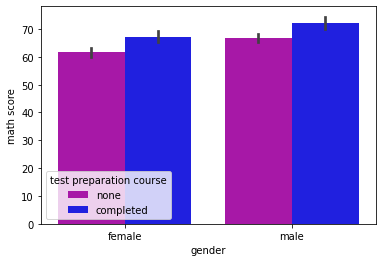

In [36]:
sns.barplot(x="gender", y="math score", hue="test preparation course", palette=["m", "b"], data=df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

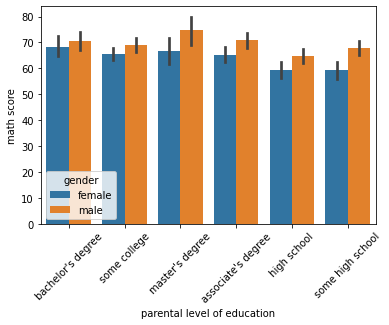

In [43]:
ax = sns.barplot(hue="gender", y="math score", x="parental level of education", data=df)
plt.xticks(rotation=45)

**Data Processing**

In [56]:
def sg(val):
    if val < 50:
        return "NQ"
    elif 51<val<60:
        return "group d"
    elif 61<val<70:
        return "group c"
    elif 71<val<80:
        return "group b"
    elif 81<val:
        return "group a"
    

In [54]:
df['mean'] = (df["math score"]+df["reading score"]+df["writing score"])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<AxesSubplot:xlabel='mean', ylabel='race/ethnicity'>

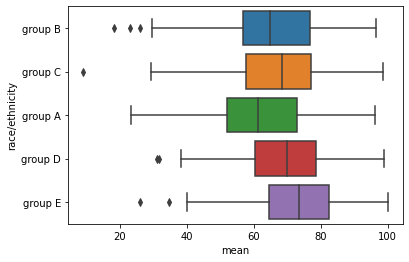

In [53]:
sns.boxplot(data=df, x="mean", y="race/ethnicity")

In [61]:
df["group"] = df["mean"].apply(sg)

In [62]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean,group
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,group b
1,female,group C,some college,standard,completed,69,90,88,82.333333,group a
2,female,group B,master's degree,standard,none,90,95,93,92.666667,group a
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,NQ
4,male,group C,some college,standard,none,76,78,75,76.333333,group b


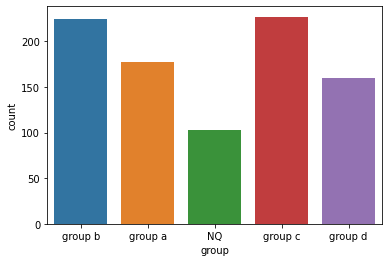

In [68]:
ax = sns.countplot(x="group", data=df)